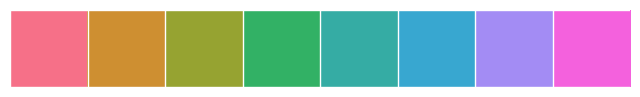

In [423]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))
import matplotlib.gridspec as gridspec

In [9]:
# data from EPA 1/4 - 1/23 noon
epa_queens=pd.read_excel('/Users/stella/Desktop/data/Queens Data_010417_012317.xls')[3:28084]
epa_queens=epa_queens.rename(index=str, columns={
                                      "SiteReport - Site Queens College Report : TimeBeginning": "Datetime",
                                      "Unnamed: 1": "PM2.5_MC (ug/m3)",
                                      "Unnamed: 2": "PM2.5_FEM_MC (ug/m3)",
                                      "Unnamed: 3": "PM2.5_Ref_Mass (ug/m3)",
                                      "Unnamed: 4": "PM10_MC (ug/m3)",
                                      "Unnamed: 5": "Ultrafine (#/cm3)"})
epa_queens['Datetime']=epa_queens['Datetime'].apply(lambda x: parse(x))

In [10]:
aqu=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170206150115.csv')
aqu['DateTime']=aqu['DateTime'].apply(lambda x: parse(x))
aqu=aqu.rename(index=str, columns={ "MEASURE_PA_LABEL":"ldsa",
                                    "MEASURE_MG_LABEL":"num",
                                    "MEASURE_N_LABEL":"pm25",
                                           
                                    "MEASURE_PA_LABEL.1":"ldsa-1",
                                    "MEASURE_MG_LABEL.1":"num-1",
                                    "MEASURE_N_LABEL.1":"pm25-1",
                                           
                                    "MEASURE_PA_LABEL.2":"ldsa-2",
                                    "MEASURE_MG_LABEL.2":"num-2",
                                    "MEASURE_N_LABEL.2":"pm25-2",})

In [11]:
aqi=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=1)

In [24]:
print(epa_queens.columns)
print(aqu.columns)
print(aqi.columns)

Index(['Datetime', 'PM2.5_MC (ug/m3)', 'PM2.5_FEM_MC (ug/m3)',
       'PM2.5_Ref_Mass (ug/m3)', 'PM10_MC (ug/m3)', 'Ultrafine (#/cm3)'],
      dtype='object')
Index(['DateTime', 'ldsa', 'num', 'pm25', 'ldsa-1', 'num-1', 'pm25-1',
       'ldsa-2', 'num-2', 'pm25-2'],
      dtype='object')
Index(['time', 'value (µg/m³)'], dtype='object')


In [25]:
epa_queens=epa_queens.set_index('Datetime')
aqu=aqu.set_index('DateTime')
aqi=aqi.set_index('time')

In [26]:
df=epa_queens.join(aqu)

In [29]:
df2=df.join(aqi)

In [63]:
df2=df2.dropna()

In [66]:
df2=df2.reset_index()

In [69]:
df2=df2.rename(index=str,columns={"index":"datetime"})
df2=df2.rename(index=str,columns={"value (\u00B5g/m\u00B3)":"aqi pm25 (ug/m3)"})

In [87]:
df2.head(1)

,datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_Ref_Mass (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3),ldsa,num,pm25,ldsa-1,num-1,pm25-1,ldsa-2,num-2,pm25-2,aqi pm25 (ug/m3)
0,2017-01-04 15:02:00,0.37,0.26,1.71,3.6,17800,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191,3.003132


In [89]:
df3=df2.copy(False)

In [91]:
del df3['PM10_MC (ug/m3)'];del df3['Ultrafine (#/cm3)']
del df3['ldsa'];del df3['ldsa-1'];del df3['ldsa-2']
del df3['num'];del df3['num-1'];del df3['num-2']

In [94]:
df3=df3.set_index('datetime')

In [99]:
df3=df3.reset_index()

In [214]:
mask=df3['PM2.5_FEM_MC (ug/m3)'].apply(lambda x: type(x)!=str)
df3=df3[mask]
mask=df3['pm25']>0
df3=df3[mask]
mask=df3['pm25-1']>0
df3=df3[mask]
mask=df3['pm25-2']>0
df3=df3[mask]
mask=df3['aqi pm25 (ug/m3)']>0
df3=df3[mask]
mask=df3['PM2.5_MC (ug/m3)']>0
df3=df3[mask]
mask=df3['PM2.5_FEM_MC (ug/m3)']>0
df3=df3[mask]
mask=df3['PM2.5_Ref_Mass (ug/m3)']>0
df3=df3[mask]

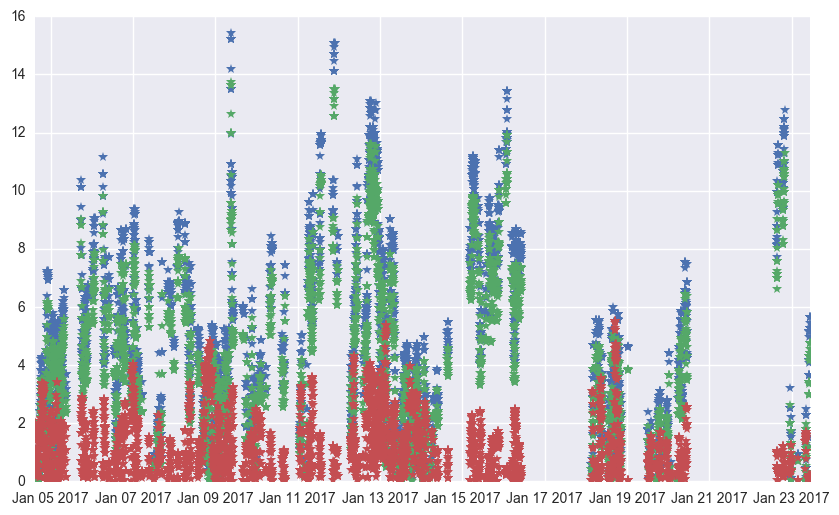

In [266]:
plt.figure(figsize=(10,6))
plt.plot(df3['datetime'],df3['pm25'])
plt.plot(df3['datetime'],df3['pm25-1'])
plt.plot(df3['datetime'],df3['pm25-2'])
plt.plot(df3['datetime'],df3['aqi pm25 (ug/m3)'])
plt.plot(df3['datetime'],df3['PM2.5_MC (ug/m3)'])
plt.plot(df3['datetime'],df3['PM2.5_FEM_MC (ug/m3)'])
plt.plot(df3['datetime'],df3['PM2.5_Ref_Mass (ug/m3)'])

In [219]:
df3=df3.reset_index()
del df3['index']

Timestamp('2017-01-04 15:02:00')

In [289]:
ts_df=pd.DataFrame(ts)

In [290]:
ts_df=ts_df.rename(index=str,columns={0:'dates'})

In [293]:
ts_df['a']=0

In [297]:
ts_df=ts_df.set_index('dates')

In [298]:
df3=df3.set_index('datetime')

In [304]:
df4=ts_df.join(df3)

In [306]:
del df4['a']

In [308]:
df4=df4.reset_index()
df4=df4.rename(columns={'index':'datetime'})

In [ ]:
pl.plot(x1,x2,'g^', label='regional')
pl.plot(y1,y2,'bo', label='local')
pl.legend( loc='upper left' )

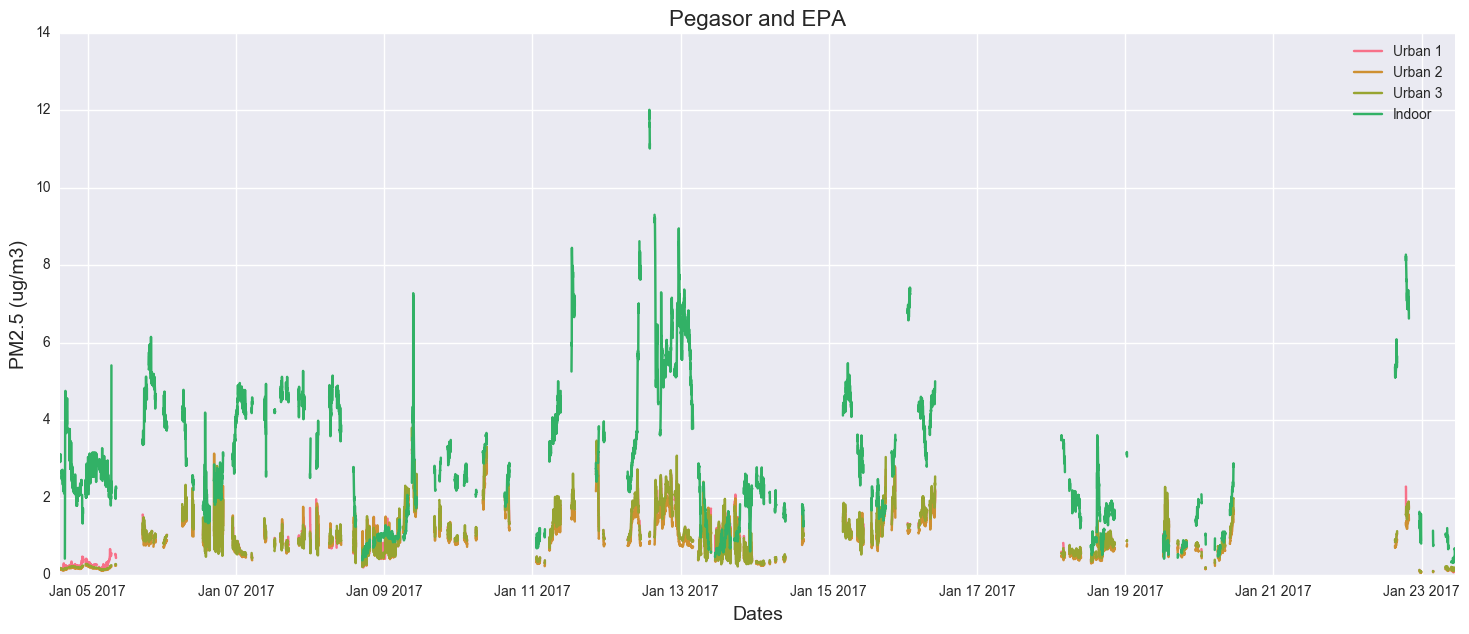

In [469]:
plt.figure(figsize=(18,7))
plt.plot(df4['datetime'],df4['pm25'],label='Urban 1',color=colorz[0])
plt.plot(df4['datetime'],df4['pm25-1'],label='Urban 2',color=colorz[1])
plt.plot(df4['datetime'],df4['pm25-2'],label='Urban 3',color=colorz[2])
plt.plot(df4['datetime'],df4['aqi pm25 (ug/m3)'],label='Indoor',color=colorz[3])
#plt.plot(df4['datetime'],df4['PM2.5_MC (ug/m3)'],label='PM2.5_MC',color=colorz[7])
#plt.plot(df4['datetime'],df4['PM2.5_FEM_MC (ug/m3)'],label='PM2.5_FEM_MC',color=colorz[5])
#plt.plot(df4['datetime'],df4['PM2.5_Ref_Mass (ug/m3)'],label='PM2.5_Ref_Mass',color=colorz[6])
plt.legend(loc='best')
plt.ylabel('PM2.5 (ug/m3)',fontsize=14); plt.xlabel('Dates',fontsize=14)
plt.title('Pegasor and EPA',fontsize=16)
plt.savefig('/Users/stella/Desktop/pm25_all.pdf')

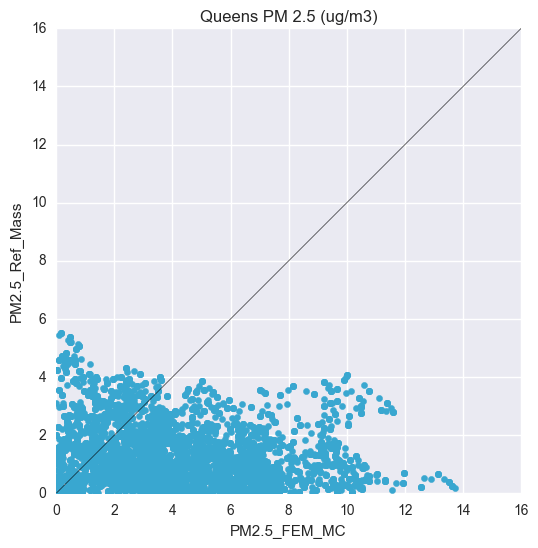

In [438]:
plt.figure(figsize=(6,6))
plt.plot([0,16], [0,16], color='k', linestyle='-', linewidth=0.4)
plt.xlim([0,16]);plt.ylim([0,16])
plt.scatter(df4['PM2.5_FEM_MC (ug/m3)'],df4['PM2.5_Ref_Mass (ug/m3)'],color=colorz[5])
plt.xlabel('PM2.5_FEM_MC');plt.ylabel('PM2.5_Ref_Mass')
plt.title('Queens PM 2.5 (ug/m3)')
plt.savefig('/Users/stella/Desktop/pm25-fem-frm.pdf')

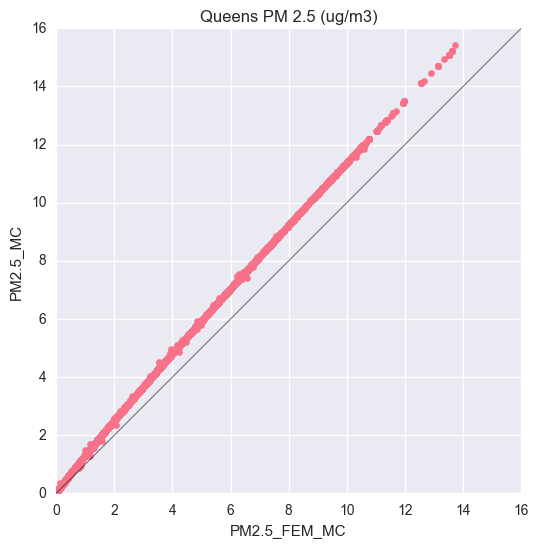

In [439]:
plt.figure(figsize=(6,6))
plt.plot([0,16], [0,16], color='k', linestyle='-', linewidth=0.4)
plt.xlim([0,16]);plt.ylim([0,16])
plt.scatter(df4['PM2.5_FEM_MC (ug/m3)'],df4['PM2.5_MC (ug/m3)'],color=colorz[0])
plt.xlabel('PM2.5_FEM_MC');plt.ylabel('PM2.5_MC')
plt.title('Queens PM 2.5 (ug/m3)')
plt.savefig('/Users/stella/Desktop/pm25-fem-mc.pdf')

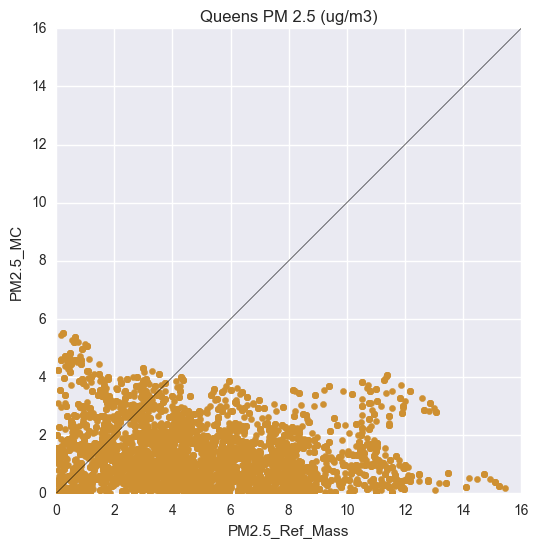

In [441]:
plt.figure(figsize=(6,6))
plt.plot([0,16], [0,16], color='k', linestyle='-', linewidth=0.4)
plt.xlim([0,16]);plt.ylim([0,16])
plt.scatter(df4['PM2.5_MC (ug/m3)'],df4['PM2.5_Ref_Mass (ug/m3)'],color=colorz[1])
plt.xlabel('PM2.5_Ref_Mass');plt.ylabel('PM2.5_MC')
plt.title('Queens PM 2.5 (ug/m3)')
plt.savefig('/Users/stella/Desktop/pm25-mc-frm.pdf')

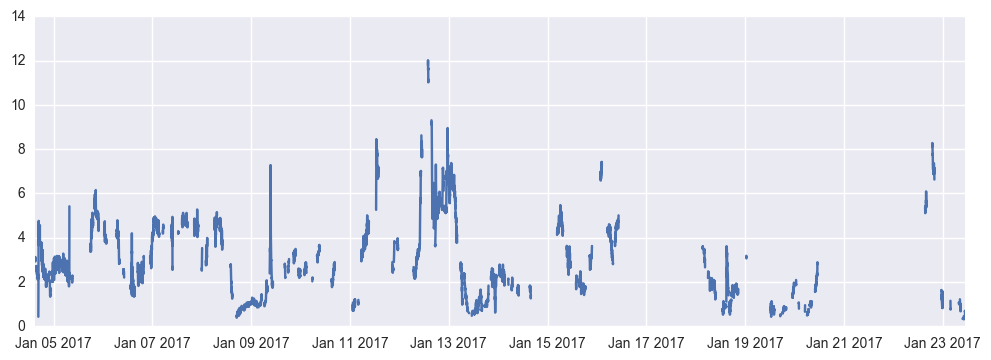

In [331]:
plt.figure(figsize=(12,4))
#plt.plot(df4['datetime'],df4['pm25'])
#plt.plot(df4['datetime'],df4['pm25-1'])
#plt.plot(df4['datetime'],df4['pm25-2'])
plt.plot(df4['datetime'],df4['aqi pm25 (ug/m3)'])
#plt.plot(df4['datetime'],df4['PM2.5_FEM_MC (ug/m3)'])